In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
dataset_path = "/content/drive/MyDrive/fashion"
train_path = "/content/drive/MyDrive/train"
val_path = "/content/drive/MyDrive/val"

for folder in [train_path, val_path]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Get class names (subfolders)
classes = os.listdir(dataset_path)

# Split and move images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Split dataset (80% Train, 20% Validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class directories
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

    # Move images
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_path, class_name, img))

print("Dataset split completed!") # Print message only once after all operations

Dataset split completed!


In [ ]:
data_dir_train = '/content/drive/MyDrive/fashion'
data_dir_test = '/content/drive/MyDrive/fashion'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths
data_dir_train = '/content/drive/MyDrive/fashion'
data_dir_test = '/content/drive/MyDrive/fashion'

# Define parameters
batch_size = 32
img_size = (256, 256)

# Load training dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

# Load testing dataset
test_ds = image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

print("Dataset loaded successfully!")

Found 3000 files belonging to 3 classes.
Found 3000 files belonging to 3 classes.
Dataset loaded successfully!


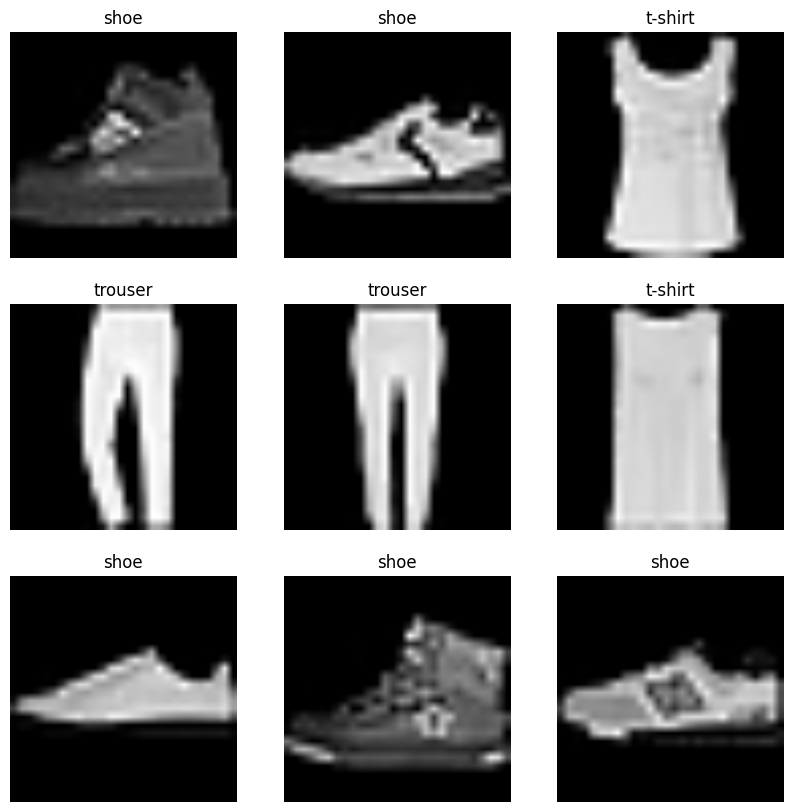

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_path = "/content/drive/MyDrive/fashion"
BATCH_SIZE = 32
IMG_HEIGHT_256 = 256
IMG_WIDTH_256 = 256
IMG_HEIGHT_200 = 200
IMG_WIDTH_200 = 200


train_rgb_generator_256 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_256, IMG_WIDTH_256),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

train_rgb_generator_200 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_200, IMG_WIDTH_200),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

Found 2400 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


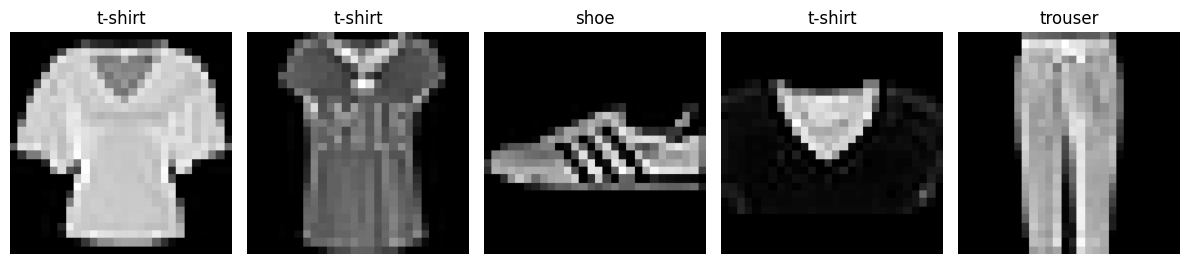

In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

gray_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

def display_gray_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_gray_images(train_gray_generator, num_images=5)

Found 2400 images belonging to 3 classes.


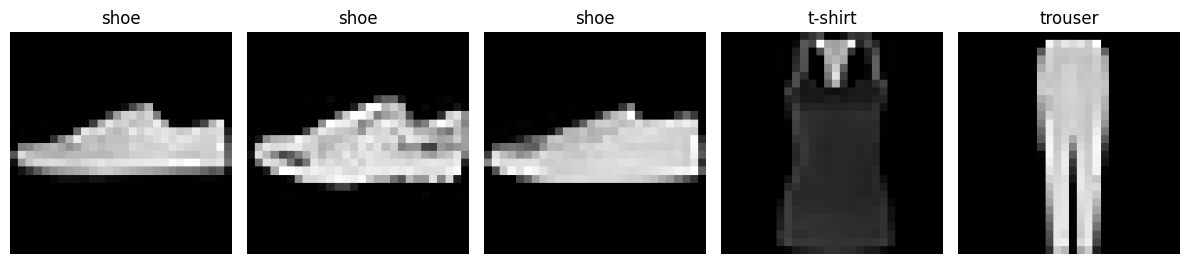

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32

dataset_path = "/content/drive/MyDrive/fashion"

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_rgb_generator = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

def display_rgb_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        label_index = labels[i].argmax()
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_rgb_images(train_rgb_generator, 5)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

# ... (Your previous code for data loading and preprocessing) ...

# 1. Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',  # or 'grayscale' if using grayscale images
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',  # or 'grayscale' if using grayscale images
    class_mode='categorical',
    subset='validation'
)

# 2. Model Definition with Dropout and L2 Regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), # Adjust input shape if needed
           kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    MaxPooling2D((2, 2)),
    # Add more Conv2D/MaxPooling2D layers if desired
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)), # L2 regularization
    Dropout(0.5),  # Experiment with dropout rate
    Dense(len(class_names), activation='softmax')
])

# 3. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 5. Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust the number of epochs
    callbacks=[early_stopping]
)
model.summary()



Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 802ms/step - accuracy: 0.6499 - loss: 14.3719 - val_accuracy: 0.8867 - val_loss: 2.2162
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 755ms/step - accuracy: 0.8524 - loss: 1.7552 - val_accuracy: 0.9283 - val_loss: 0.8954
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 746ms/step - accuracy: 0.8657 - loss: 0.9347 - val_accuracy: 0.9200 - val_loss: 0.7562
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 741ms/step - accuracy: 0.8440 - loss: 0.8825 - val_accuracy: 0.9383 - val_loss: 0.6343
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 737ms/step - accuracy: 0.8524 - loss: 0.7742 - val_accuracy: 0.9000 - val_loss: 0.6808
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 759ms/step - accuracy: 0.8500 - loss: 0.7635 - val_accuracy: 0.9017 - val_loss: 0.7209
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 769ms/step - accuracy: 0.8476 - loss: 0.8640 - val_accuracy: 0.9083 - val_loss: 0.6579


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,197,387 (756.06 MB)

 Trainable params: 66,065,795 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,131,592 (504.04 MB)

In [ ]:
# 6. Evaluate the Model
loss, accuracy = model.evaluate(val_generator) # Evaluate on validation set
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Print training accuracy and loss for each epoch
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch + 1}: Training Loss = {history.history['loss'][epoch]}, Training Accuracy = {history.history['accuracy'][epoch]}")
    print(f"            Validation Loss = {history.history['val_loss'][epoch]}, Validation Accuracy = {history.history['val_accuracy'][epoch]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.9240 - loss: 0.6300
Validation Loss: 0.6289867758750916
Validation Accuracy: 0.9266666769981384
Epoch 1: Training Loss = 7.767583847045898, Training Accuracy = 0.7437499761581421
            Validation Loss = 2.216177463531494, Validation Accuracy = 0.8866666555404663
Epoch 2: Training Loss = 1.4491125345230103, Training Accuracy = 0.8516666889190674
            Validation Loss = 0.8953679203987122, Validation Accuracy = 0.9283333420753479
Epoch 3: Training Loss = 0.8831722140312195, Training Accuracy = 0.8650000095367432
            Validation Loss = 0.7561690807342529, Validation Accuracy = 0.9200000166893005
Epoch 4: Training Loss = 0.8553873896598816, Training Accuracy = 0.8479166626930237
            Validation Loss = 0.6342541575431824, Validation Accuracy = 0.9383333325386047
Epoch 5: Training Loss = 0.7657235264778137, Training Accuracy = 0.8529166579246521
            Validation Loss = 0.6808160543441772, Validation Accur

Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


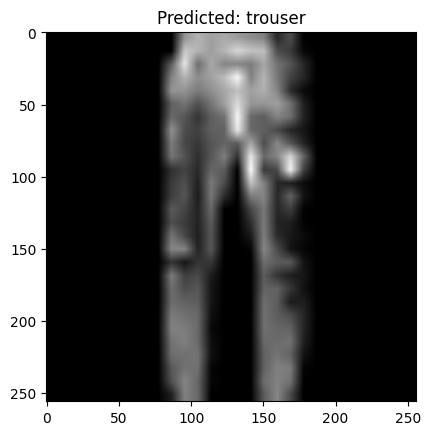

In [ ]:
# Save the model
model.save('cnn_model.h5')
print("Model saved successfully!")

# Predict on a batch of test images
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {class_names[tf.argmax(predictions[4]).numpy()]}")
    plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 607ms/step
Classification Report:
              precision    recall  f1-score   support

        shoe       0.29      0.28      0.28       200
     t-shirt       0.33      0.28      0.30       200
     trouser       0.34      0.40      0.37       200

    accuracy                           0.32       600
   macro avg       0.32      0.32      0.32       600
weighted avg       0.32      0.32      0.32       600



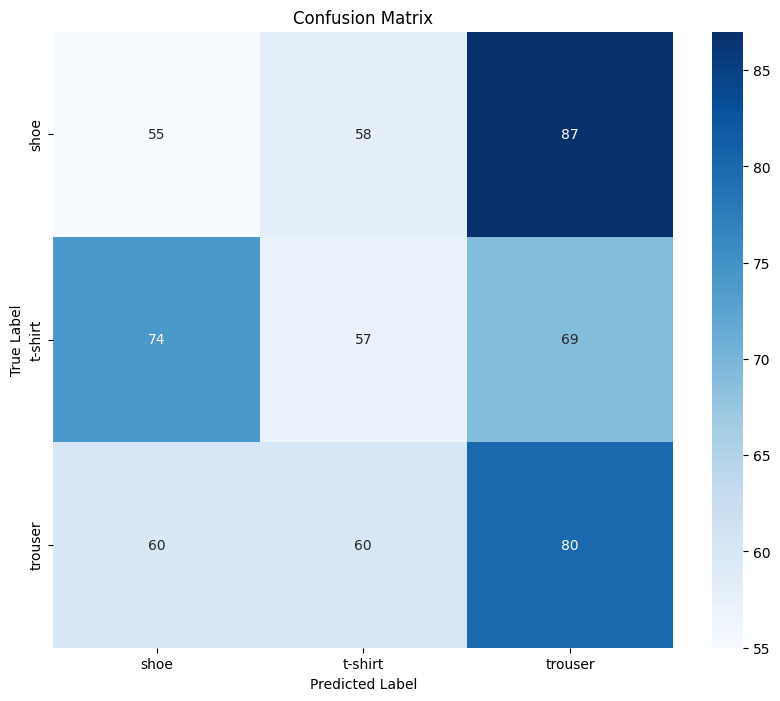

In [ ]:
# Evaluate the Model and Generate Classification Report/Confusion Matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on Validation Data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels

# 2. Get True Labels
y_true = val_generator.classes  # True labels of validation data

# 3. Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

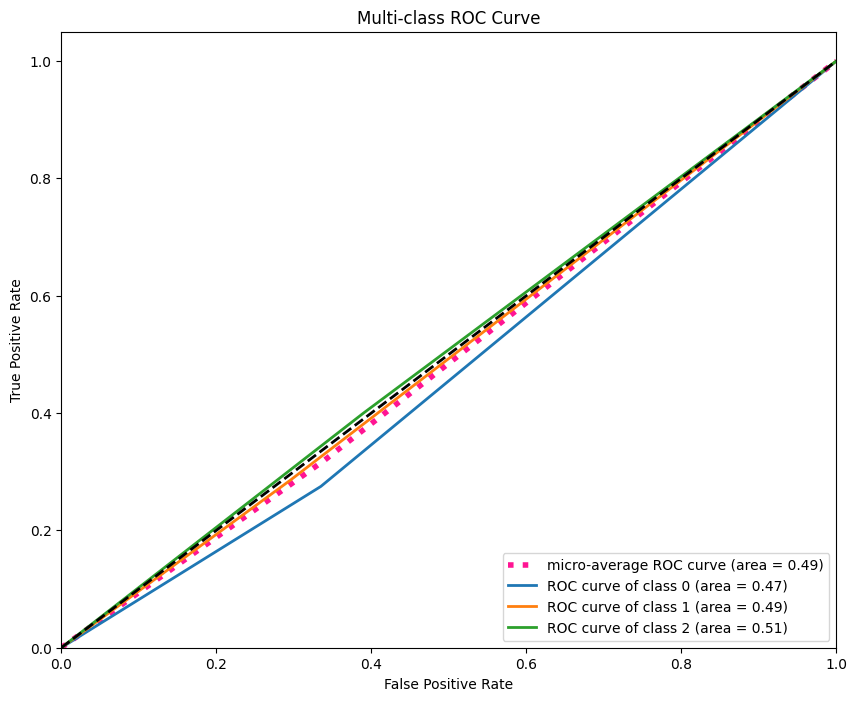

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels (for multi-class ROC)
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_true))
n_classes = y_true_bin.shape[1]

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-averaging (calculate metrics globally)
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class and micro-averaged curve
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from scipy import stats


sample1 = np.random.normal(50, 10, 100)
sample2 = np.random.normal(52, 10, 100)


t_stat, p_value = stats.ttest_ind(sample1, sample2)
print(f"Z-Test: T-stat = {t_stat:.2f}, p-value = {p_value:.4f}")


t_stat, p_ttest = stats.ttest_ind(sample1, sample2)
print(f"T-Test: T-stat = {t_stat:.2f}, p-value = {p_ttest:.4f}")


sample3 = np.random.normal(48, 10, 100)
anova_stat, p_anova = stats.f_oneway(sample1, sample2, sample3)
print(f"ANOVA Test: F-stat = {anova_stat:.2f}, p-value = {p_anova:.4f}")

Z-Test: T-stat = -2.54, p-value = 0.0117
T-Test: T-stat = -2.54, p-value = 0.0117
ANOVA Test: F-stat = 7.68, p-value = 0.0006
